# ¿Cómo calcular $\sqrt{2}$?

¡Facíl con la app calculadora de mi celular! 

Bien, pero sabemos que en 1600 BC mesopotamia ya se habia calculado la raiz de $\sqrt{2}=1.414213$ correcto a 6 decimales. Probablemente fue calculado utilizando el algoritmo que hoy se conoce com el metodo Babilonico.

La explicacion de este algoritmo normalmente se deduce a partir de un [rectangulo](https://es.wikipedia.org/wiki/C%C3%A1lculo_de_la_ra%C3%ADz_cuadrada#Algoritmo_babil%C3%B3nico) con area igual al numero que se le desa calcular el area y atraves de un proceso iterativo convertirlo en un cuadrado con la misma area.
Aqui deduciremos el mismo algoritmo apartir de un metodo numerico para encontrar los ceros de la funccion $f(x)=x^2 - S$ (¿puedes mostrar porque esta funcion?).
Para encontrar numericamente los ceros de una funcion existen diversos metodos, uno de los mas populares es el el metodo de [Newton-Raphson](https://es.wikipedia.org/w/index.php?title=M%C3%A9todo_de_Newton-Raphson) (a veces llamado simplemente de Newton).
En este articulo deduciremos la formula del metodo Babilonico y lo implementaremos en Python. Voy a asumir que ya tienen un conocimiento basico de las librerias [Numpy](https://www.numpy.org) y [Matplotlib](https://www.matplotlib.org)

## Metodo de Newton-Raphson

Este metodo de Newton-Raphson se vasa en buscar los ceros de la función apartir de una serie de aproximaciones lineales, cada vez mas cercanas a el cero real.

![Animacion del metodo de newton](NewtonIteration_Ani.gif "")

Como ya mencionamos los ceros de la funcion $f(x)=x^2 - S$ son $\pm\sqrt{S}$ por lo tantoo al buscarlos con este metodo obtendremos la respuesta.


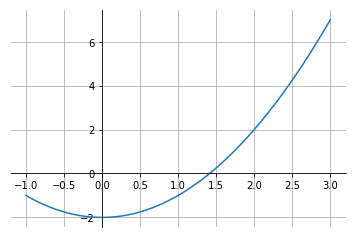

In [2]:
import matplotlib.pyplot as plt
import numpy as np

S = 2
x = np.linspace(-1, 3, 100)

def f(x, S=2):
    return x**2 - S

plt.plot(x, f(x))
plt.grid()
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.show()

El primer paso es partir de un valor inicial $x_0$. Luego podemos aproximar la funcion en este punto con su linea tangente. Usando la derivada sabemos que la recta tangene a este punto es 

$$ f(x) \approx f'(x_0)(x - x_0) + f(x_0) $$

Luego podemos encontrar una nueva aproximacion para el cero despejando $x$. 

$$x_1 = x_0 - f(x_0)/f'(x_0)$$

Finalmente remplazando con la funcion $f(x)$ encontramos que luego de $k$ iteraciones una aproximacion para la raiz de $S$ esta dada por las siguientes ecuaciones (¿puedes ver porque?)

$$x_{k} = \frac{S+x_{k-1}^2}{2x_{k-1}}$$
$$\sqrt{S} =  \lim_{k \rightarrow \infty}x_k$$



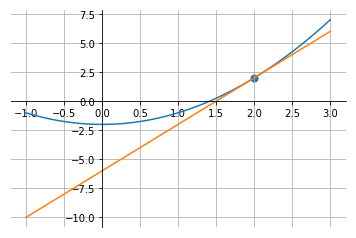

In [3]:
def f_prime(x):
    return 2*x

x0 = 2
plt.scatter([x0], [f(x0)], 50)
plt.plot(x, f(x))
plt.plot(x, f_prime(x0)*(x - x0) + f(x0))
plt.grid()
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.show()

## Implementación en Python

Si buscamos la raiz cuadrada de $2$ podemos partir con $x_0=2$ y usando las equaciones que encontramos en la seccion anterior busacar una aproximacion cada vez mas cercana al valor real.

In [9]:
S = 2
x0 = 2
x_n = [x0] # guardaremos la aprroximacion de cada iteracion
for i in range(3):
    x_prev = x_n[-1] # el ultimo elemento de la lista
    x_next = (S + x_prev**2) / (2*x_prev)
    x_n.append(x_next)

print(x_n)
print(x_n[-1])
print(f"Error: {x_n[-1] - np.sqrt(S)}")
print(np.sqrt(2))

[2, 1.5, 1.4166666666666667, 1.4142156862745099]
1.4142156862745099
Error: 2.1239014147411694e-06
1.4142135623730951


¡Listo! Ya con solo 3 iteraciones ya podemos encontrar la raiz correcta a 5 decimales, y si tan solo iteramos dos veces más ya tenemos la respuesta a 12 decimales.

Un parametro importante para el metodo de Newton es el punto de partida $x_0$. Prueba con distintos valores y obserba que para un numero pequeño de iteranciones el algoritmo no es capaz de llegar a la respuesta si el punto de partida es muy lejano al real. 

Las calculadoras y computadores implementan aproximaciones para poder garantizar una rapida convergencia. Por ahora solo implementaremos parametros extras que controlan el numero de iteraciones y la prescion de la respuesta. Lo que hacemos es itear todas las veces que sea necesario hasta que la disstancia entre la aproximacion acual y la respuesta correcta sea menor a un numero pequeño `epsilon`. Por otro lado intependiente de la calidad de la aproximación no haremos más de `maxiter` iteraciones.

In [10]:
def sqrt(S, x0=None, maxiter=100, epsilon=1e-6):
    if x0 is None:
        x0 = S
    i= 0
    while abs(x0**2-S) > epsilon and i < maxiter:
        x0 = (S + x0**2) / (2*x0)
        i = i + 1
    return x0

print(sqrt(2))

1.4142135623746899


En este cuaderno aprendimos como deducir el metodo Babilonico para encontrar raices cuadradas. El metodo de Newton-Rapson utilzado se puede aplicar para encontrar las soluciones de una gran cantidad de ecuaciones usadas en la practica incluyendo aplicacion en optimización.